In [1]:
# Modules that are needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [16]:
# Read the Data
filepath = "data1.txt"
data1 = pd.read_csv(filepath, header=None)
data1.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [18]:
# Both Shapes are (97, 1)
X = data1.iloc[:, [0]]
y = data1.iloc[:, [1]]
X.shape, y.shape

((97, 1), (97, 1))

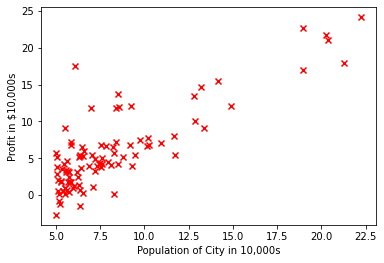

In [4]:
# Plotting the Data
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.scatter(X, y, c='red', marker='x')
plt.show()

In [5]:
m = X.size
X_b = np.c_[np.ones((m, 1)), X]    # Add ones to x0

In [6]:
# Cost Function
def computeCost(X, y, theta):
    prediction = X.dot(theta)
    cost = mean_squared_error(y, prediction)
    return cost

In [7]:
zero_theta = np.zeros((2, 1))           # Initialize theta to zeros 
cost_zero = computeCost(X_b, y, zero_theta)

print("Cost function of theta all zeros:\t{}".format(cost_zero/2))

Cost function of theta all zeros:	32.072733877455676


In [8]:
non_zero_theta = np.array([[-1], [2]])
cost_non_zero = computeCost(X_b, y, non_zero_theta)

print("Cost function of theta non-zero:\t{}".format(cost_non_zero/2))

Cost function of theta non-zero:	54.24245508201238


In [9]:
# Gradient Descent
def grad_desc(X, y, theta, alpha, iterations):
    m = np.size(y)
    for i in range(iterations):
        prediction = X.dot(theta)
        theta = theta - alpha * (1/m) * (X.T.dot((prediction - y)))
        
    return theta

In [10]:
theta = np.zeros((2,1))
alpha = 0.01
iterations = 1500

theta_best = grad_desc(X_b, y, theta, alpha, iterations)

print("Theta computed from Gradient Descent:\n\tTheta_0:\t{}\n\tTheta_1:\t{}".format(theta_best[0][0], theta_best[1][0]))

Theta computed from Gradient Descent:
	Theta_0:	-3.63029143940436
	Theta_1:	1.166362350335582


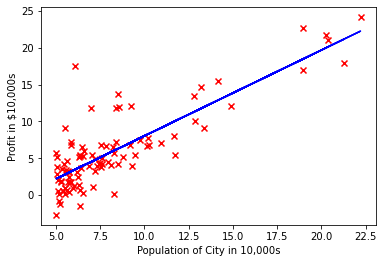

In [11]:
# Plot the Linear Fit
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.scatter(X, y, c='red', marker='x')
plt.plot(X, X_b.dot(theta_best), c='b')
plt.show()

In [12]:
# Predict value for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]).dot(theta_best)
predict2 = np.array([1, 7]).dot(theta_best)
print("For population = 35,000, we predict a profit of:\n\t{}".format(predict1[0] * 10000))
print("For population = 70,000, we predict a profit of:\n\t{}".format(predict2[0] * 10000))

For population = 35,000, we predict a profit of:
	4519.7678677017675
For population = 70,000, we predict a profit of:
	45342.45012944714


In [13]:
# Here's a 2-dimensional gird of Theta values to understand the cost function better.
# The code below will use these values to produce surface and contour plots of the costs.
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        t = [[theta0_vals[i]], [theta1_vals[j]]]
        J_vals[i][j] = computeCost(X_b, y, t)

# Because of the way meshgrids work in the surf command, we need to 
# transpose J_vals before calling surf, or else the axes will be flipped.
J_vals = J_vals.T

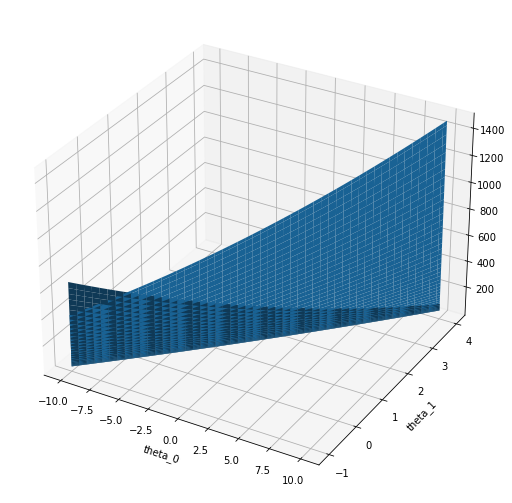

In [14]:
# Surface plot
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.plot_surface(theta0_vals, theta1_vals, J_vals)
plt.show()

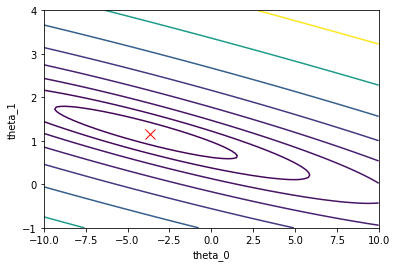

In [15]:
# Contour plot
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.xlabel('theta_0')
plt.ylabel('theta_1');
plt.plot(theta_best[0], theta_best[1], 'rx', markersize=10, linewidth=2);
plt.show()